# Insights and findings
 1) I noticed that we have few outliers in each stores and by my opinion when we will build model, we should clean them
 2) Also I found out that in several families increasing sales was near to 2017, we should note it ML model.
 3) Large or small stores are doing same business from previous months
 4) I made sure that weekend sales is always high,  need to use this information for feature engineering.

In [1]:
# Import libraries
import unittest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Unit tests

In [2]:
# Unit tests, for checking data, sometimes in production we can have problems with source of data
def len_df(df):
    return len(df)

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertTrue(len_df(oil)>0)
        self.assertTrue(len_df(holidays_events)>0)
        self.assertTrue(len_df(stores)>0)
        self.assertTrue(len_df(train)>0)
        self.assertTrue(len_df(test)>0)
        self.assertTrue(len_df(transactions)>0)

In [3]:
# Reading data
datafolder = '/Users/nurik/Documents/kaggle/store-sales-time-series-forecasting/'
oil= pd.read_csv(os.path.join(datafolder,'oil.csv'))
holidays_events=pd.read_csv(os.path.join(datafolder,'holidays_events.csv'))
stores= pd.read_csv(os.path.join(datafolder,'stores.csv'))
train= pd.read_csv(os.path.join(datafolder,'train.csv'))
#train = pd.DataFrame({'col1':[],'col2':[]})
test= pd.read_csv(os.path.join(datafolder,'test.csv'))
transactions= pd.read_csv(os.path.join(datafolder,'transactions.csv'))
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [4]:
# Preprocess data
train["date"] = pd.to_datetime(train.date)# conerting from string to date
test["date"] = pd.to_datetime(test.date)# conerting from string to date
transactions["date"] = pd.to_datetime(transactions.date)# conerting from string to date

train.onpromotion = train.onpromotion.astype("float16")
train.sales = train.sales.astype("float32")
stores.cluster = stores.cluster.astype("int8")

# creating datasets to do EDA 
agg_df = train.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(['family','date'])
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
# creating new columns related to date, for EDA
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['day_name'] = pd.to_datetime(train['date']).dt.day_name()
train['year'] = pd.to_datetime(train['date']).dt.year

### EDA

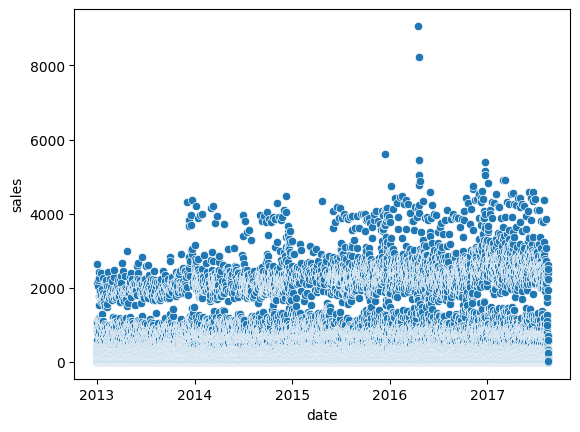

In [18]:

# Checking Sales in first store
# few outliers in 1 store
sns.scatterplot(train[train.store_nbr==1], x="date", y="sales")
plt.show()

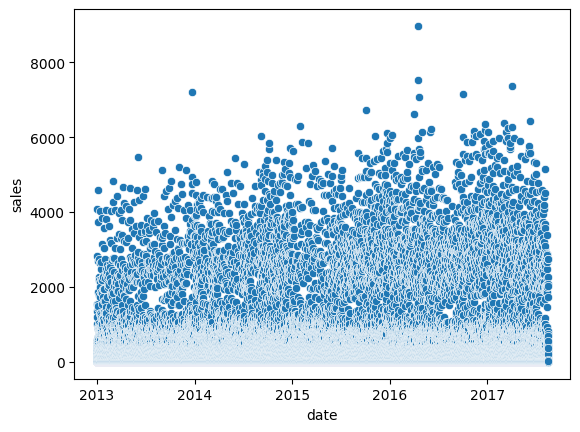

In [19]:

# in 4 store also few outliers
sns.scatterplot(train[train.store_nbr==4], x="date", y="sales")
plt.show()

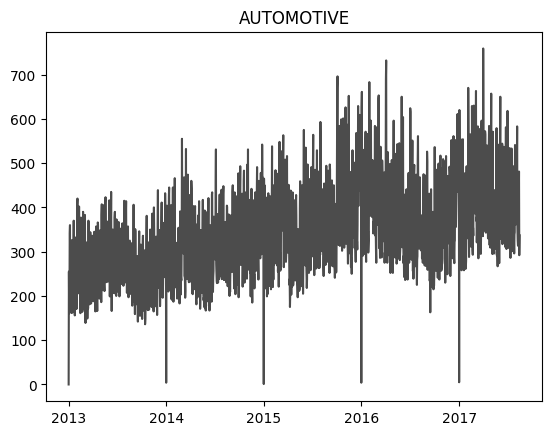

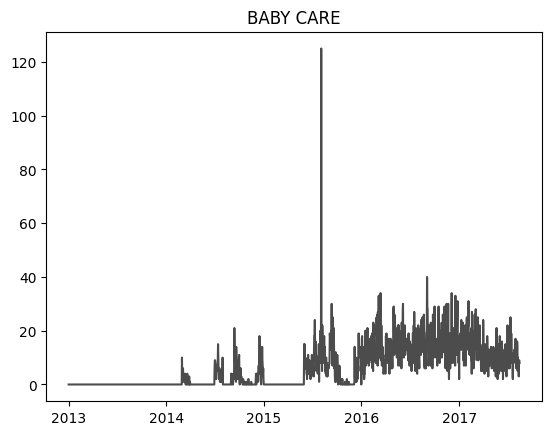

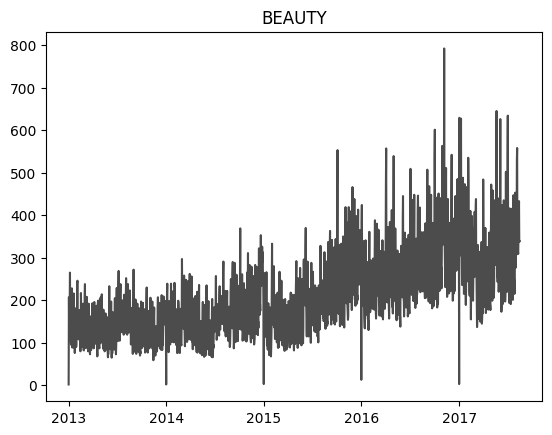

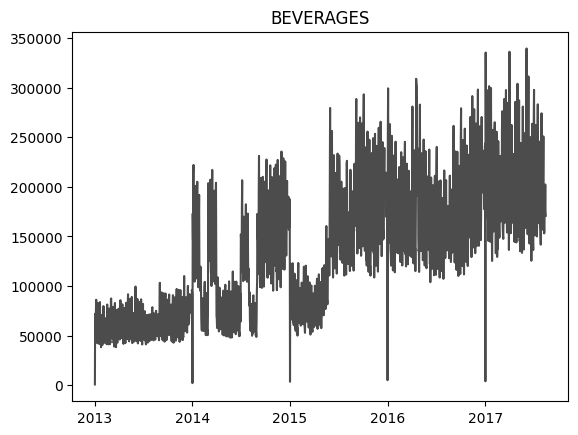

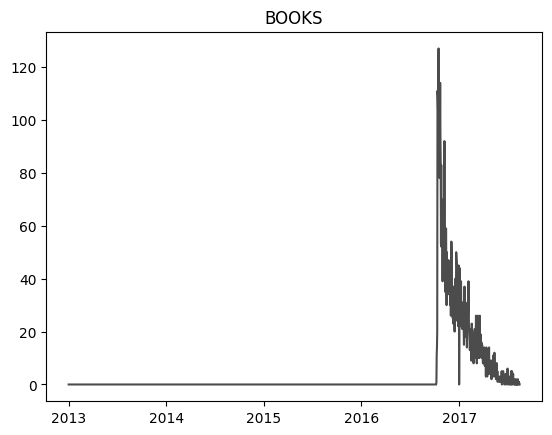

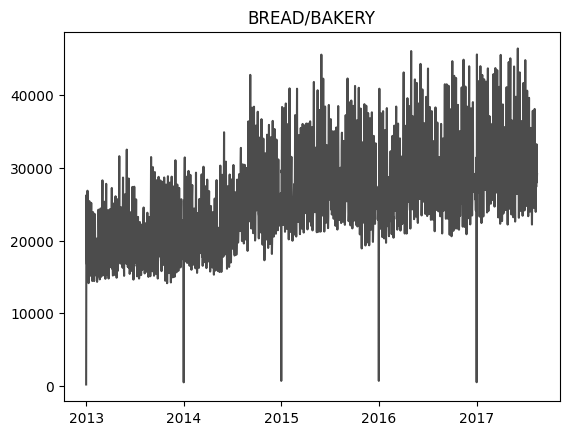

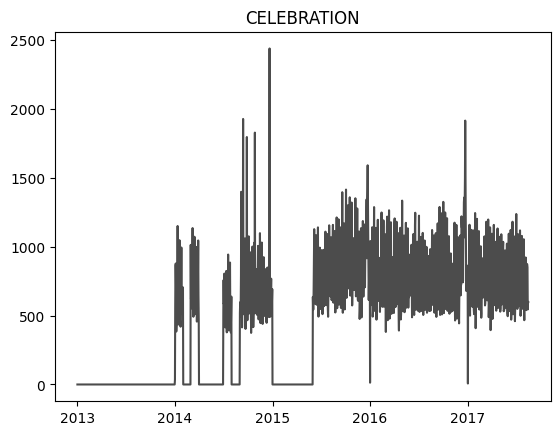

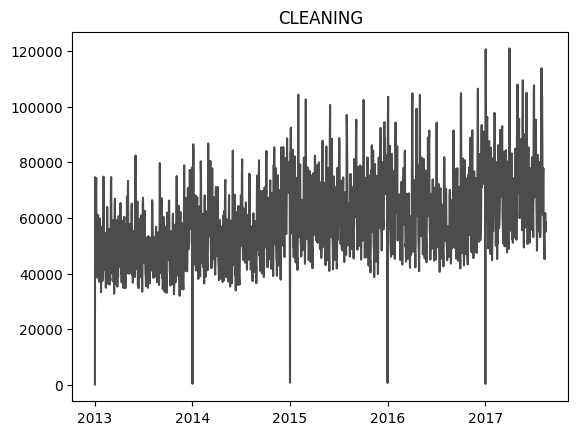

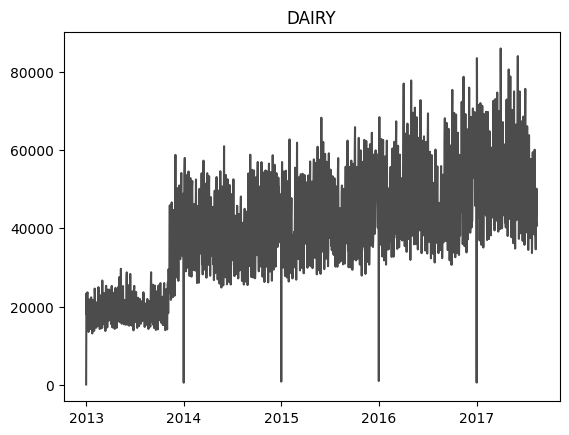

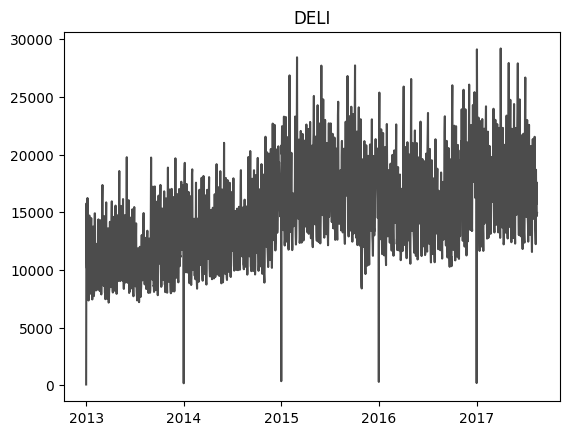

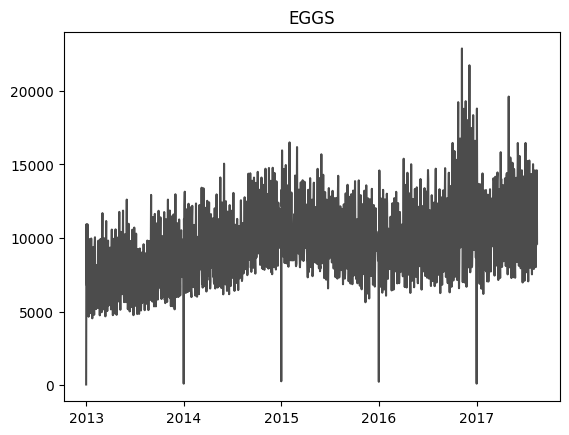

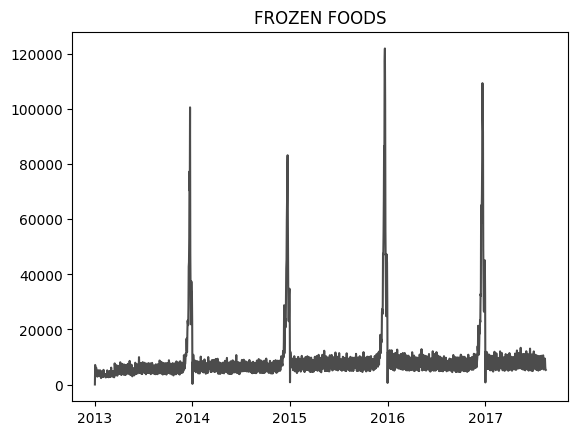

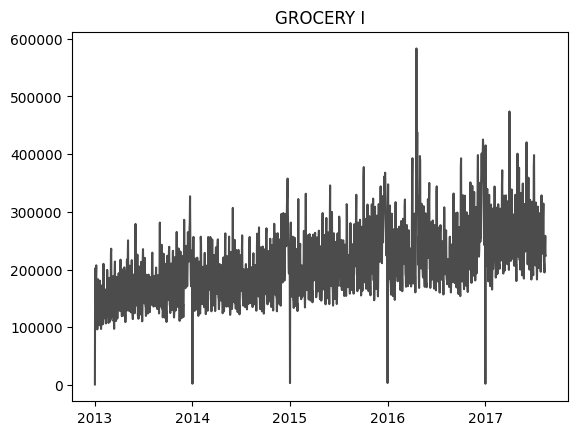

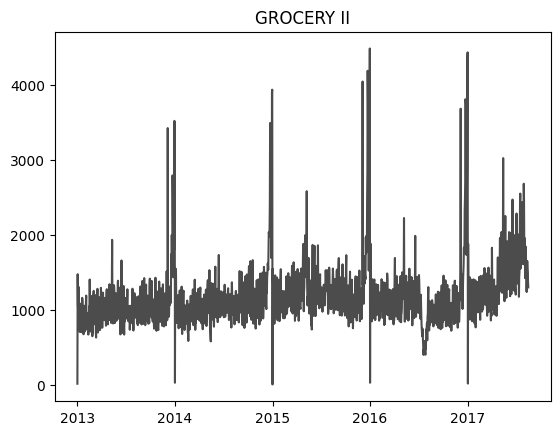

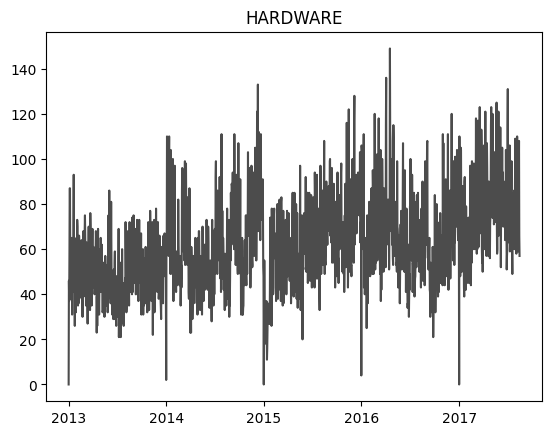

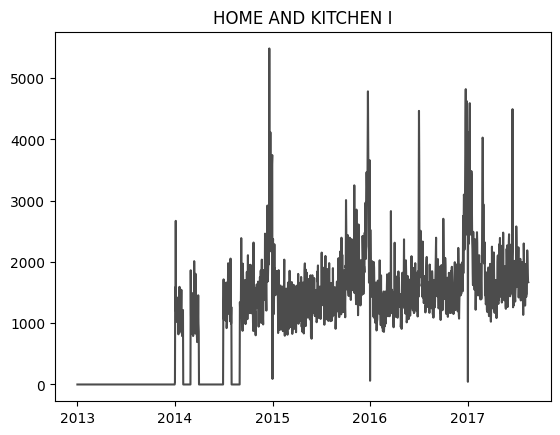

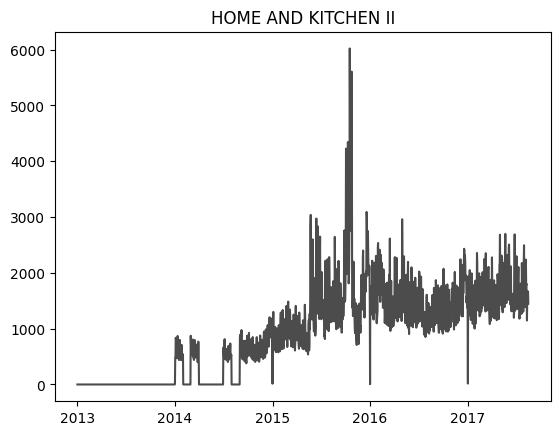

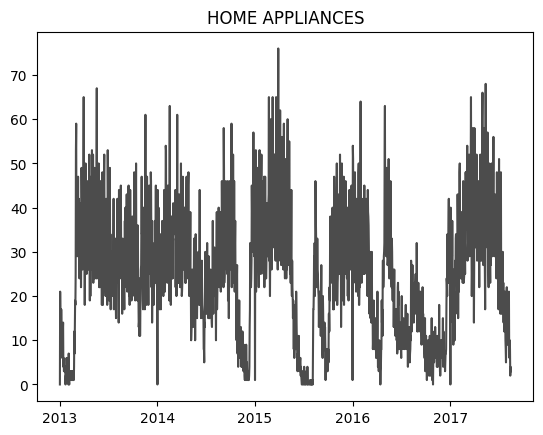

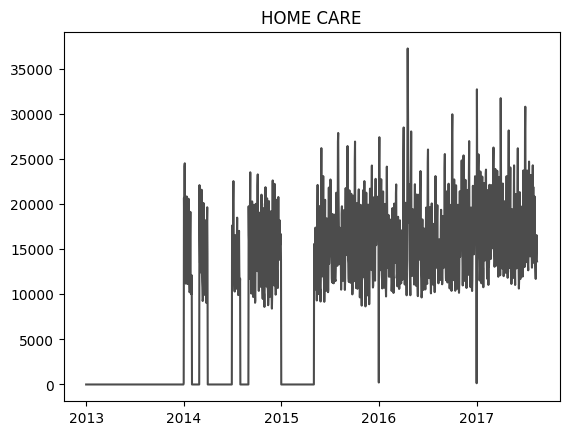

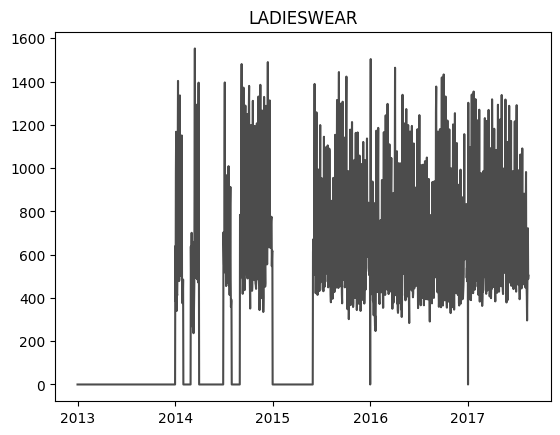

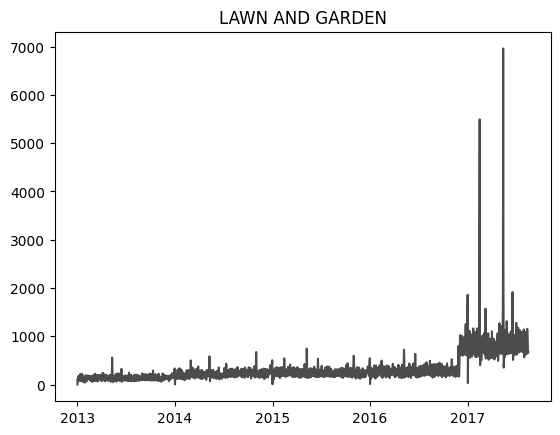

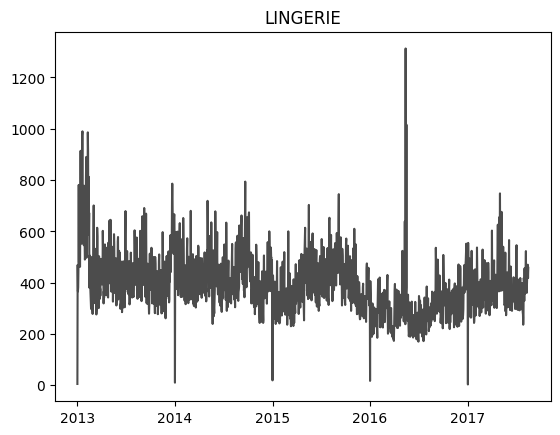

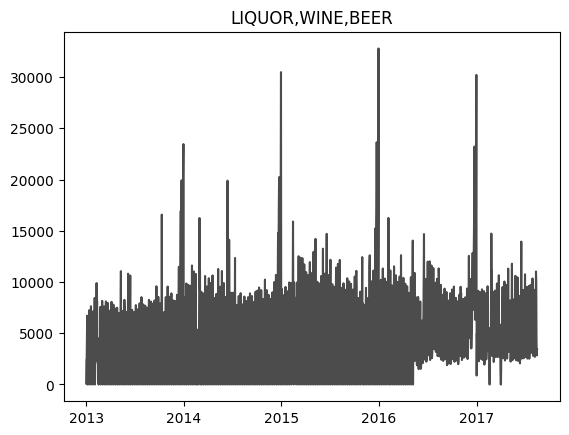

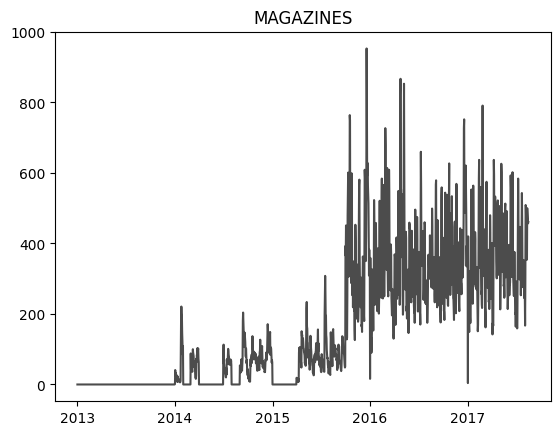

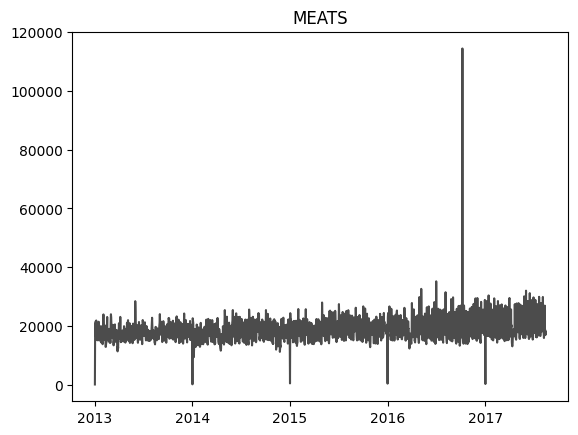

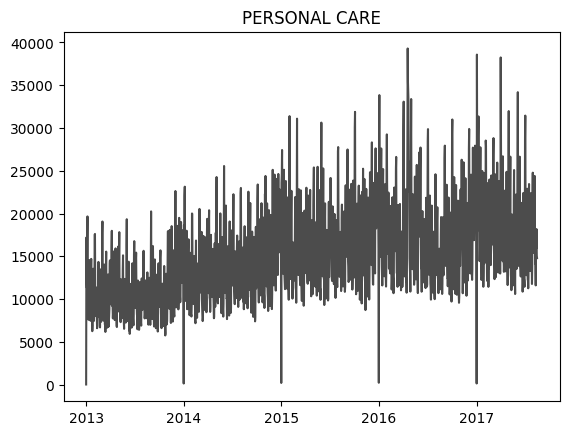

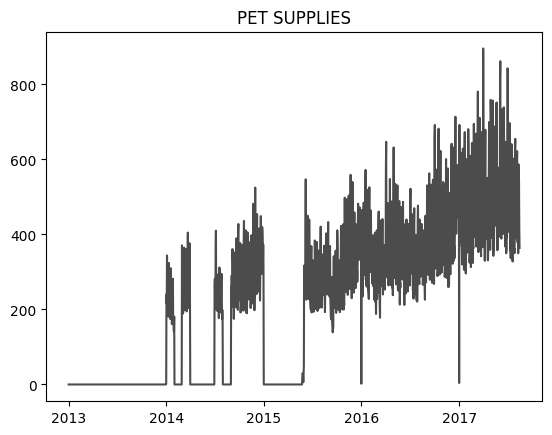

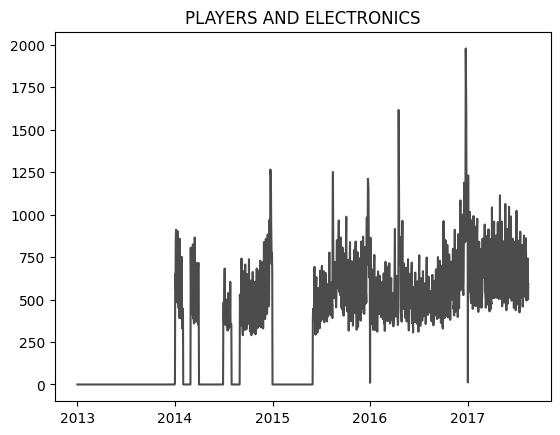

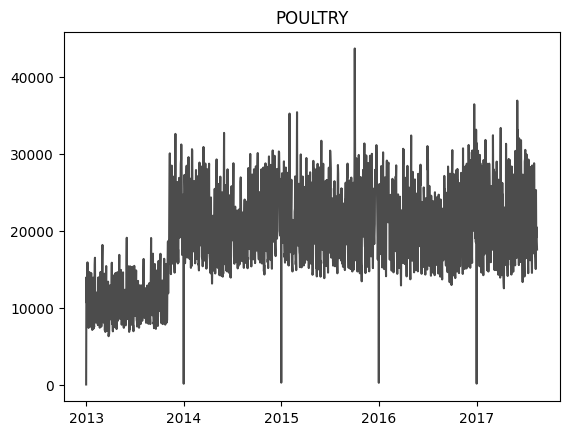

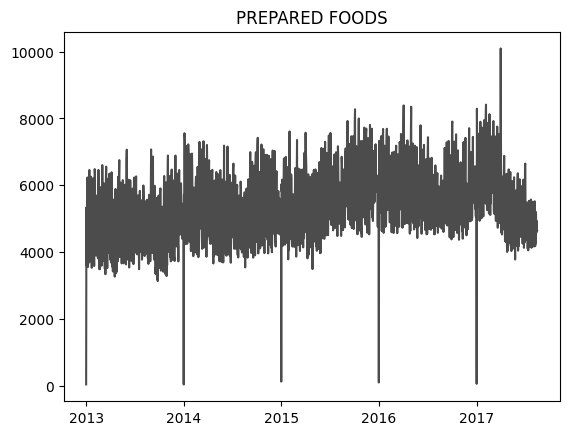

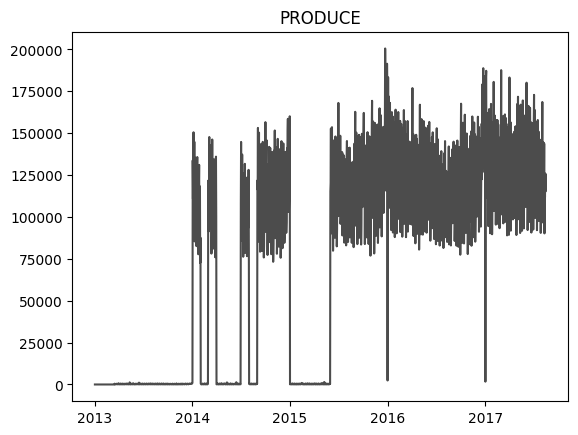

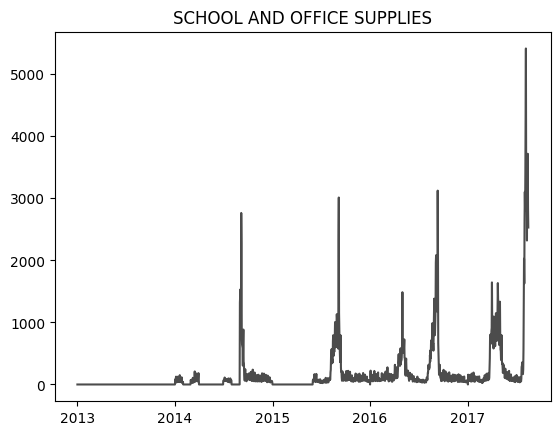

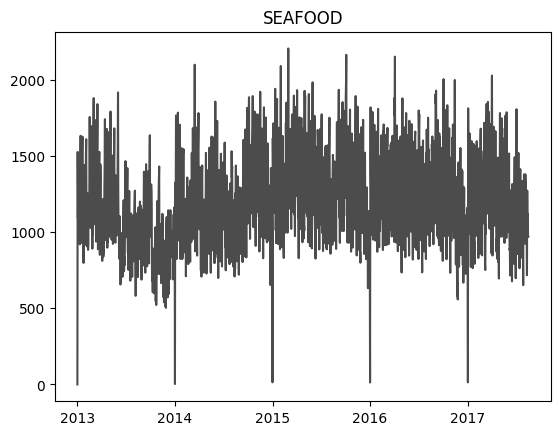

In [7]:
# Let checking sales of our categories, may be we wil have low sales 
# As I see below that we have different type of sales in families, with their own trend, seasonality, cyclic. 
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column], color='black', alpha=0.7)
    plt.title(column)
    plt.show()

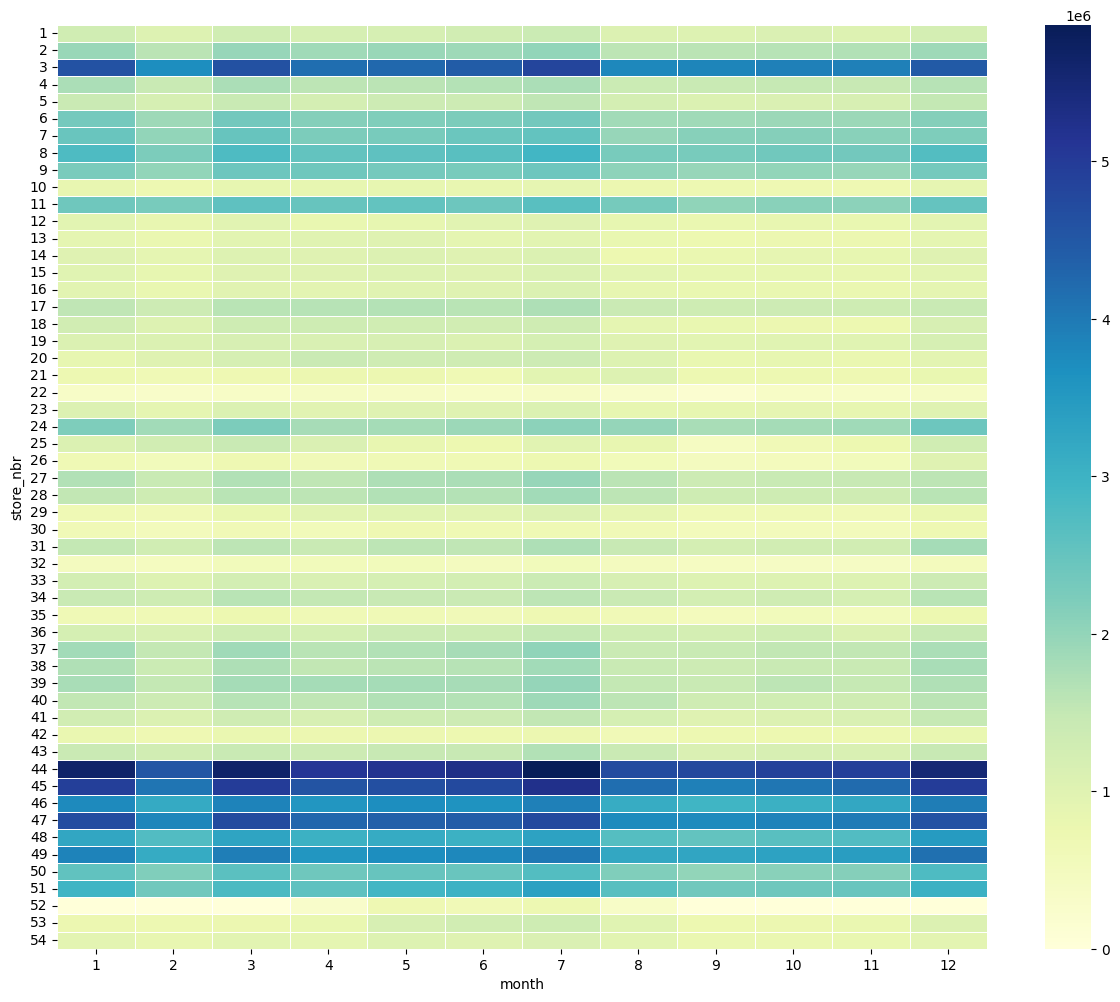

In [8]:
# check the sales across the months to understand the pattern. 
# In this case we clearly don't see gradual increase of sales for any stores over time. 
table = pd.pivot_table(train, values ='sales', index =['store_nbr'],
                         columns =['month'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(15,12))         
sns.heatmap(table, annot=False, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

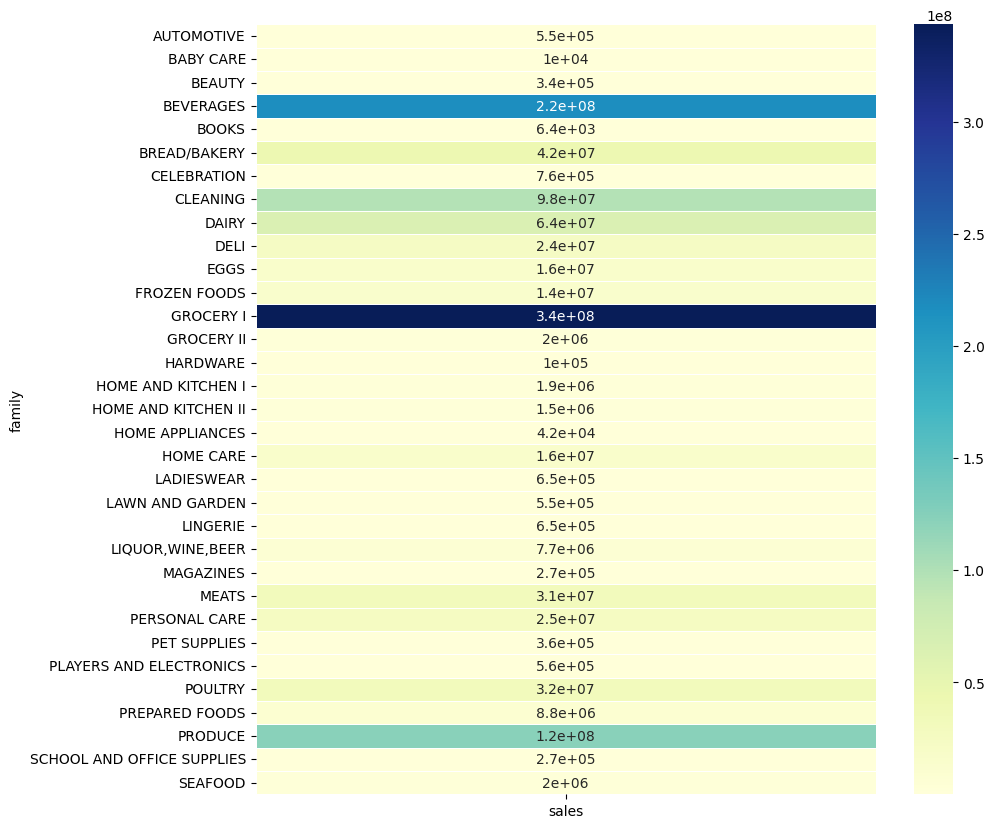

In [9]:
# check how the different family is impacting the sales, clearly here we have a pattern here, we will use 
# this information later for feature engineering. 

table1 = pd.pivot_table(train, values ='sales', index =['family'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table1, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

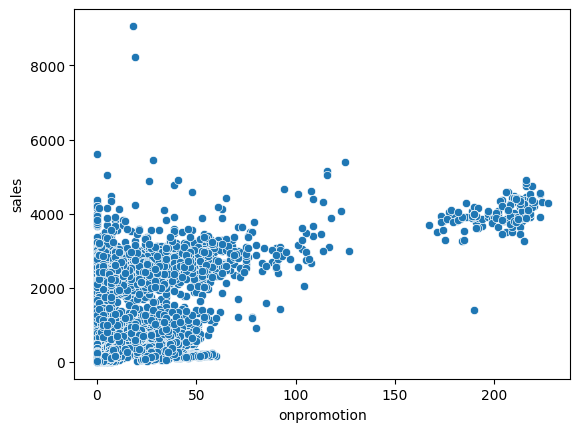

In [20]:
# taking two stores [1 and 2] for checking the impact of promotion on sales.
# clearly there is a week bound between sales and promotion. 
sns.scatterplot(train[train.store_nbr==1], x="onpromotion", y="sales")
plt.show()


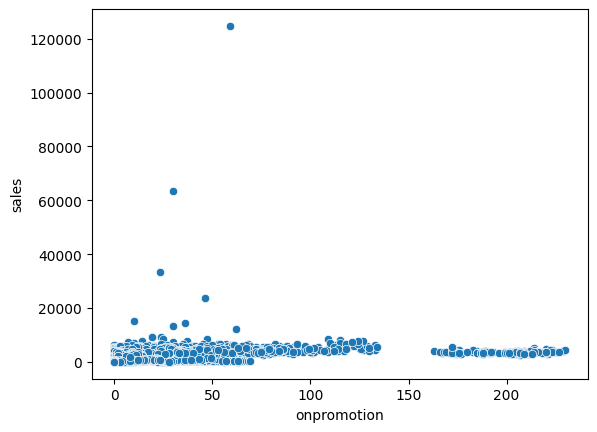

In [21]:
sns.scatterplot(train[train.store_nbr==2], x="onpromotion", y="sales")
plt.show()

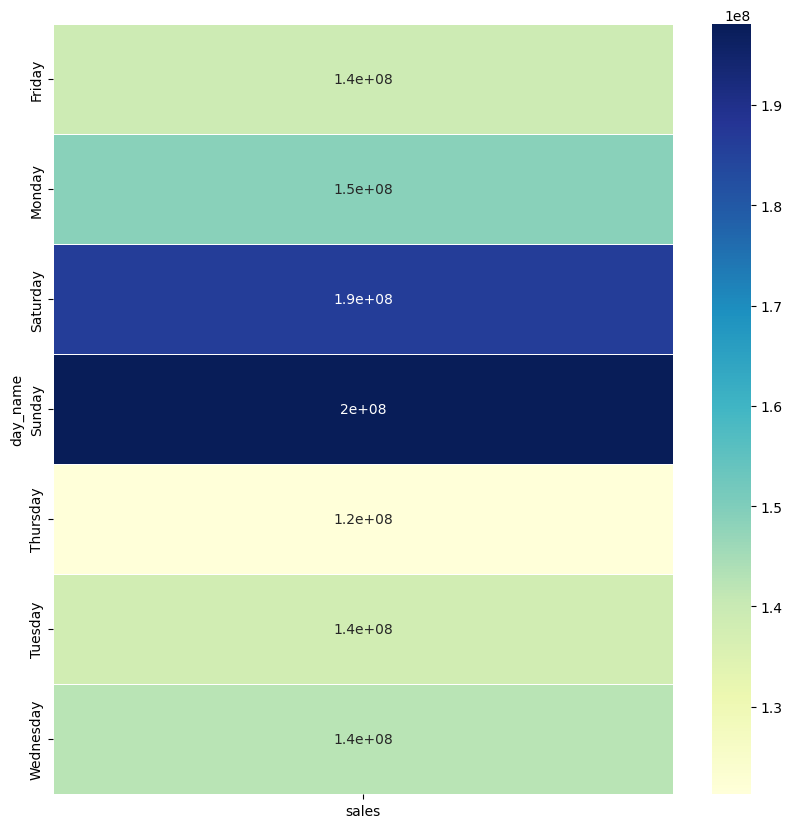

In [12]:
# checking if any day of the week have impact on sales
table3 = pd.pivot_table(train, values ='sales', index =['day_name'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table3, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

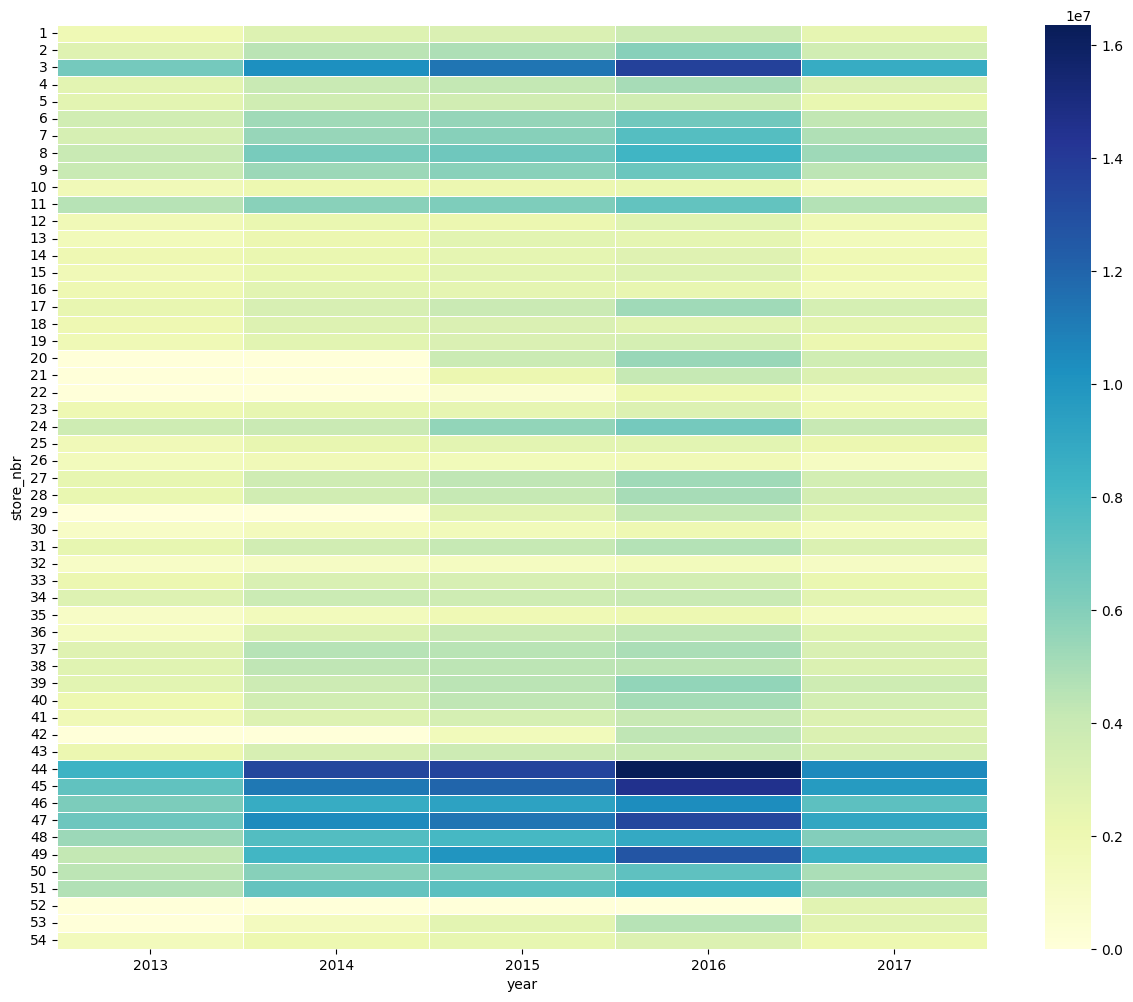

In [13]:
# checking if the sales year have any impact
#  there is a weak co-relation with year and sales.  
table_year = pd.pivot_table(train, values ='sales', index =['store_nbr'],
                         columns =['year'], aggfunc = np.sum)

fig, ax = plt.subplots(figsize=(15,12))         
sns.heatmap(table_year, annot=False, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

In [24]:
# Transacrion grpah in each stores(transactions - invoice of customer), alse correlation between sales and transactions
temp = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
print("Spearman Correlation between Total Sales and Transactions: {:,.4f}".format(temp.corr("spearman").sales.loc["transactions"]))

Spearman Correlation between Total Sales and Transactions: 0.8175


/var/folders/4_/_r14vnsn3kzdmgxzqg064gsm0000gn/T/ipykernel_37843/467681369.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/_r14vnsn3kzdmgxzqg064gsm0000gn/T/ipykernel_37843/467681369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



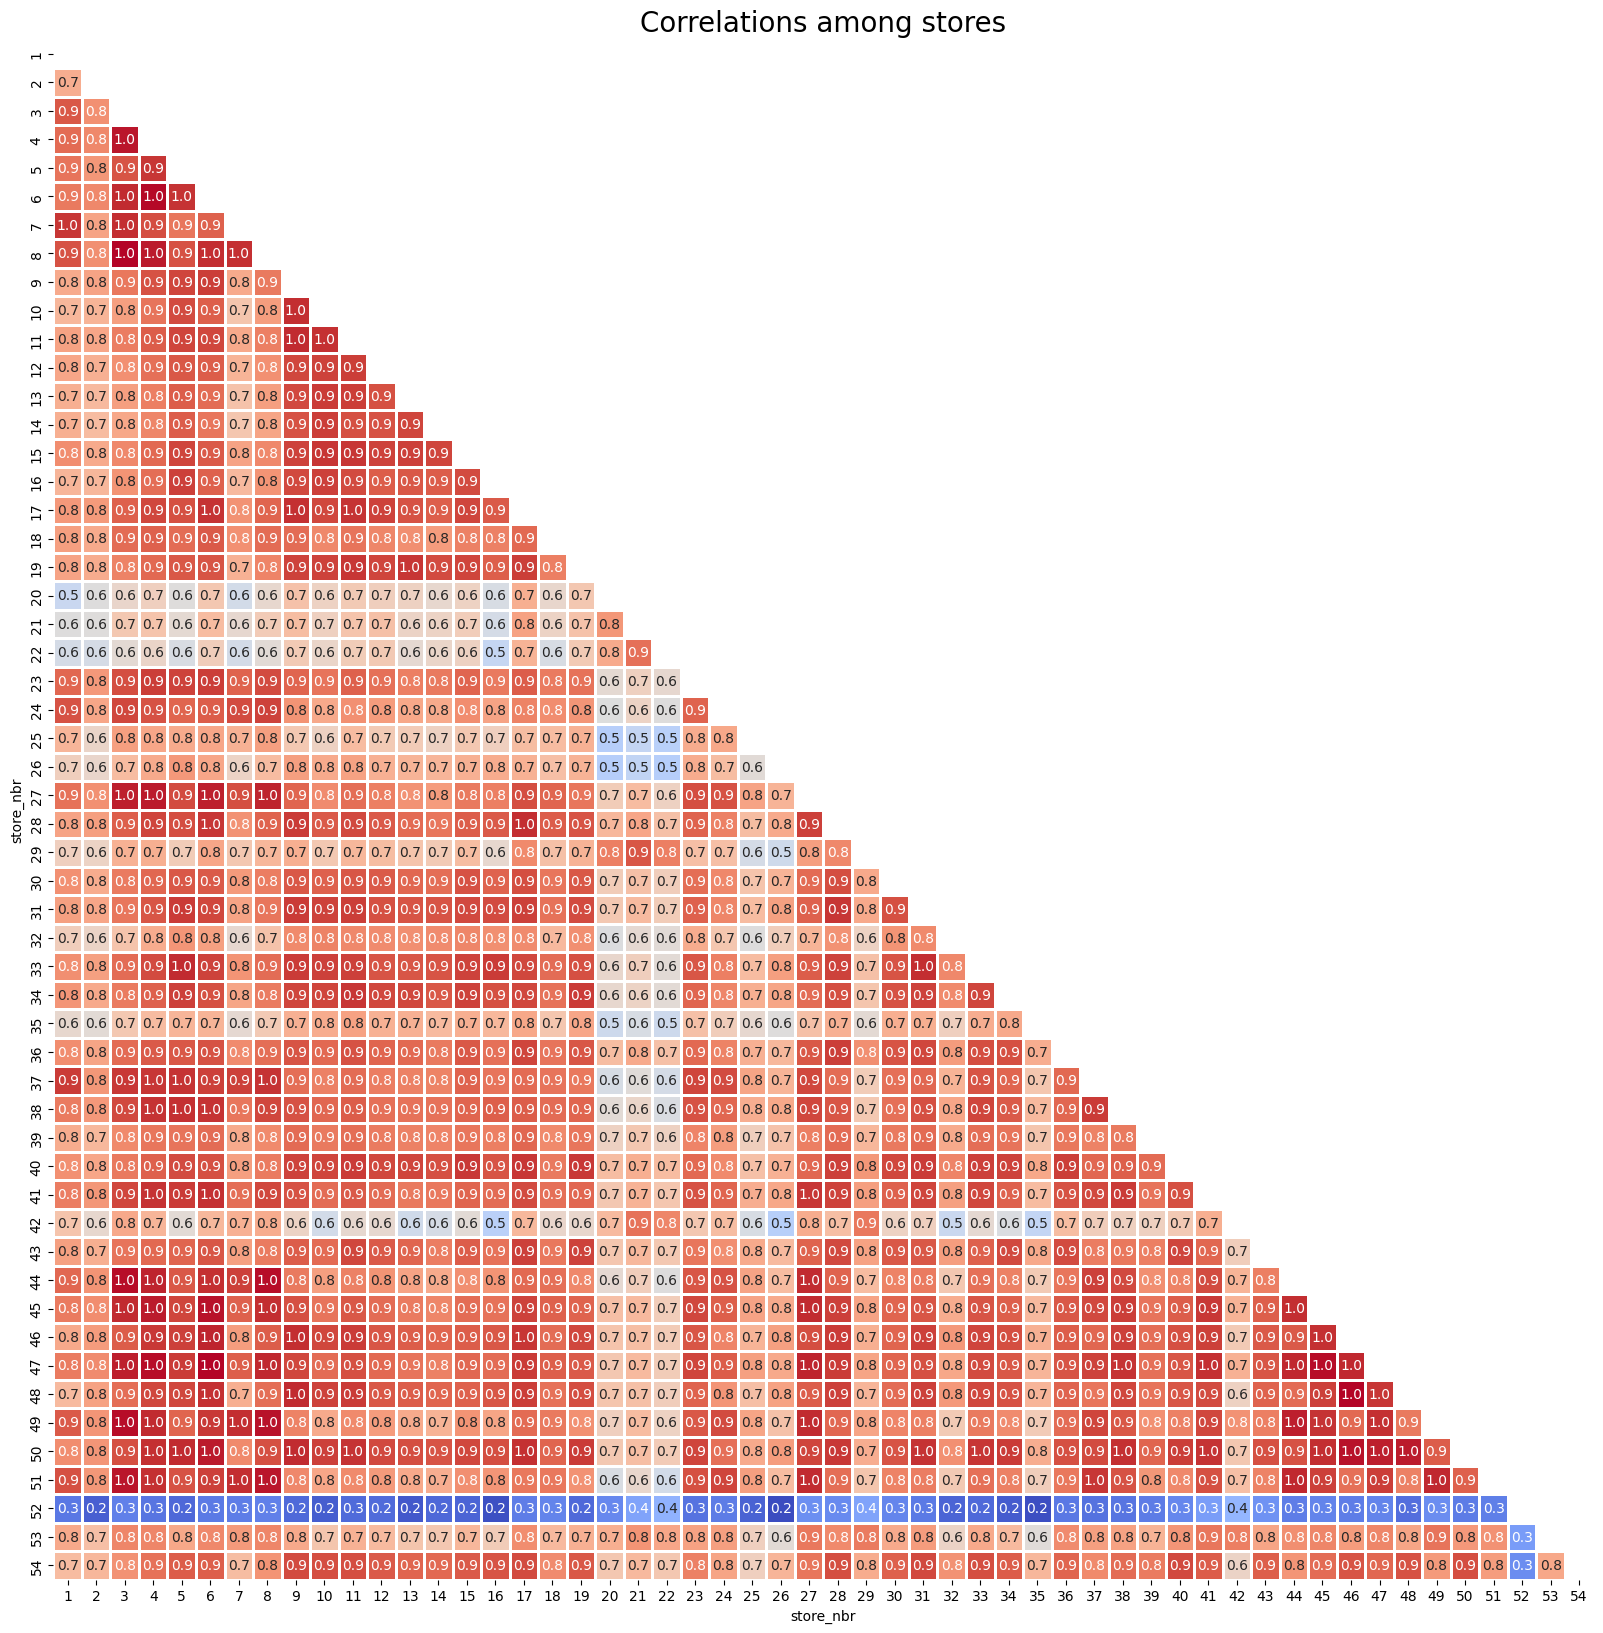

In [15]:
# Correlation between stores
# We could see suspicious stores:20,21,22 and 52. May be stores in towns.
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(a.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

In [16]:
# Zero Forecasting
# We could see that we have families and stores with zero sales in all time, for such families we won't predict with model
c = train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"])
c = c[c.sales == 0]
c

store_nbr           family  sales
1             1        BABY CARE    0.0
397          13        BABY CARE    0.0
727          23        BABY CARE    0.0
1420         44        BABY CARE    0.0
1453         45        BABY CARE    0.0
1486         46        BABY CARE    0.0
1519         47        BABY CARE    0.0
1552         48        BABY CARE    0.0
1585         49        BABY CARE    0.0
1618         50        BABY CARE    0.0
1651         51        BABY CARE    0.0
1684         52        BABY CARE    0.0
268           9            BOOKS    0.0
301          10            BOOKS    0.0
334          11            BOOKS    0.0
367          12            BOOKS    0.0
400          13            BOOKS    0.0
433          14            BOOKS    0.0
466          15            BOOKS    0.0
499          16            BOOKS    0.0
532          17            BOOKS    0.0
565          18            BOOKS    0.0
598          19            BOOKS    0.0
631          20            BOOKS    0.0
664          21            BOOKS    0.0
697          22            BOOKS    0.0
895          28            BOOKS    0.0
928          29            BOOKS    0.0
961          30            BOOKS    0.0
994          31            BOOKS    0.0
1027         32            BOOKS    0.0
1060         33            BOOKS    0.0
1093         34            BOOKS    0.0
1126         35            BOOKS    0.0
1159         36            BOOKS    0.0
1258         39            BOOKS    0.0
1291         40            BOOKS    0.0
1390         43            BOOKS    0.0
1687         52            BOOKS    0.0
1753         54            BOOKS    0.0
514          16       LADIESWEAR    0.0
811          25       LADIESWEAR    0.0
910          28       LADIESWEAR    0.0
943          29       LADIESWEAR    0.0
1042         32       LADIESWEAR    0.0
1075         33       LADIESWEAR    0.0
1141         35       LADIESWEAR    0.0
1306         40       LADIESWEAR    0.0
1405         43       LADIESWEAR    0.0
1768         54       LADIESWEAR    0.0
449          14  LAWN AND GARDEN    0.0
977          30  LAWN AND GARDEN    0.0
1769         54  LAWN AND GARDEN    0.0